#**Thai sentiment analysis about education in Thailand on Twitter.** 🙂😐☹️

# **Data Collection** 🐻 🐼 🐻‍❄️

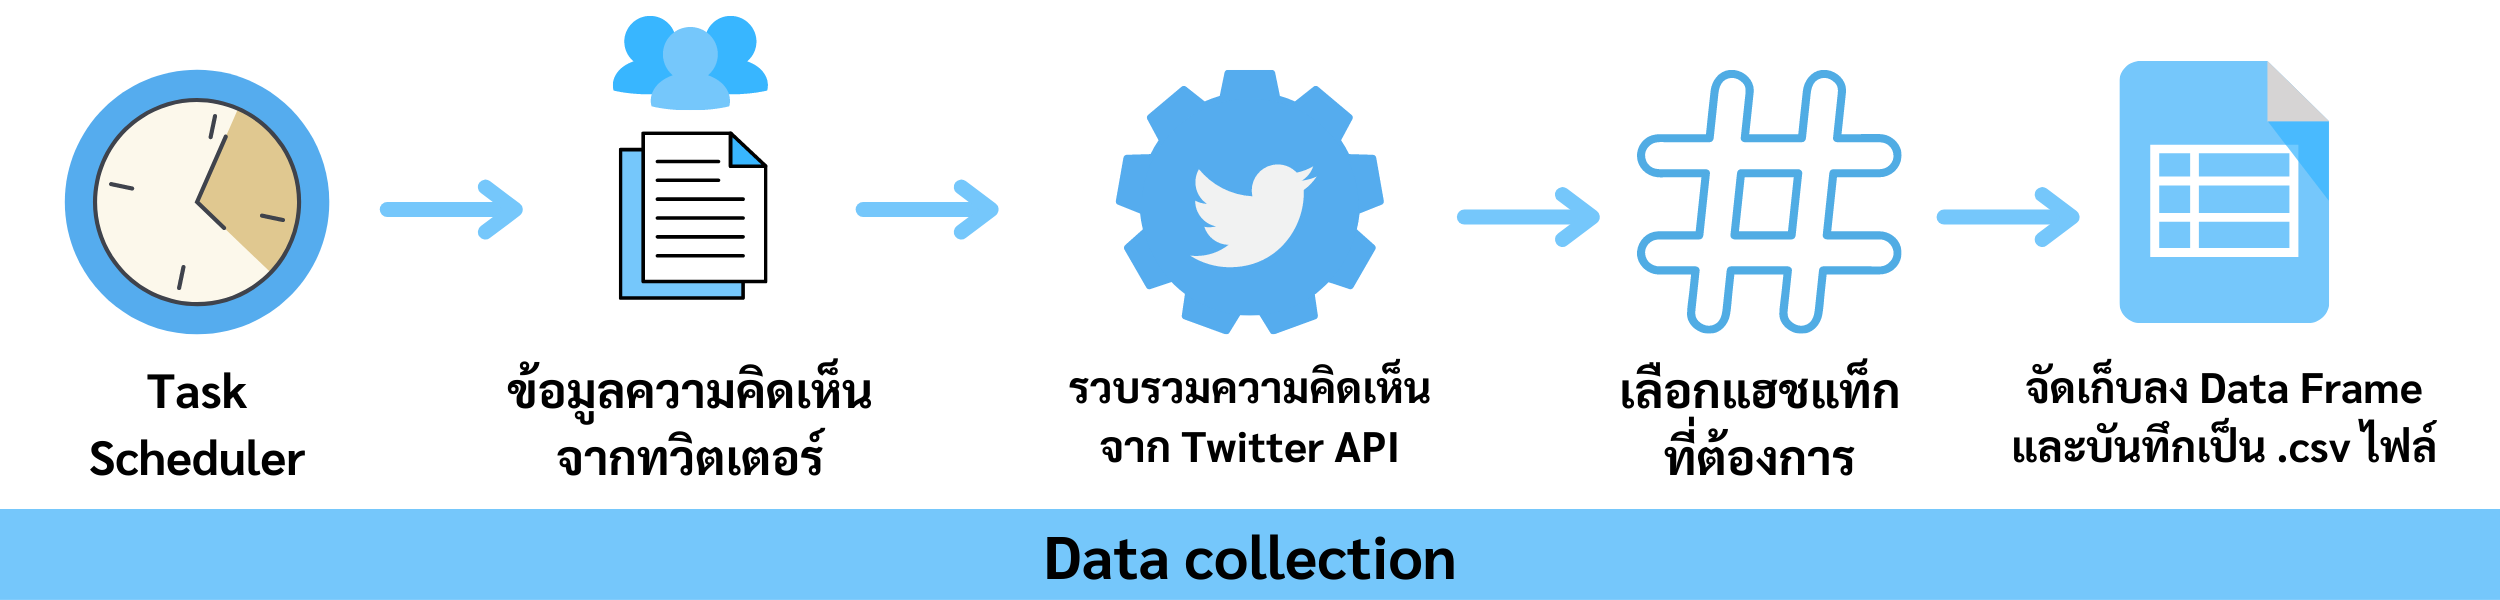

# การนำเข้าแพ็คเกจที่จำเป็น

In [2]:
# import library
import pandas as pd
import tweepy as tw

# **Twitter API**

ในการเก็บข้อมูลจะต้องใช้ Keys และ Tokens ดังนั้นจึงต้องขอ Keys และ Tokens จากทางทวิตเตอร์ก่อน ซึ่งในการขอ API จากทางทวิตเตอร์มีวิธี ดังนี้   
📌📌📌 [get Twitter API](https://www.canva.com/design/DAE7PkNTCX8/SjZiWlG7EpaZ6olzpw3aJw/view?utm_content=DAE7PkNTCX8&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton) หรือ [วิธีขอ Twitter API](https://drive.google.com/file/d/1zcBG42ZmEGNy83lvAPrGA0YJV4Qd0BJ2/view?usp=sharing) 😃

# Keys & Tokens

In [ ]:
# Twitter API v1
## Keys & Tokens
consumer_key = "xxxx" 
consumer_secret = "xxxx"
access_token = "xxxx"
access_token_secret = "xxxx"

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tw.API(auth, wait_on_rate_limit = True)

In [ ]:
# เก็บข้อมูลจากทวิตเตอร์
search_words = "#การศึกษาไทย OR #การศึกษา"
new = search_words +"-filter:retweets"  #ไม่เอา retweet

[คำอธิบายในแต่ละ attribute](https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet)   
โดย describtion หมายถึง tweet.text เป็นข้อความที่ผู้ใช้ทวีต  

In [ ]:
# ดึงข้อมูลจากทวิตเตอร์
tweets = tw.Cursor(api.search,q=new, lang="th").items(1000)

# ดึงข้อมูลจากทวิตเตอร์โดยเลือกใช้ข้อมูล ดังนี้
users_locs = [[tweet.text] for tweet in tweets] # Tweets

# สร้างเป็น DataFrame
tws = pd.DataFrame(data = users_locs,columns = ['description'])
tws

,description
0,"อยากเห็น""โรงเรียดีของนักเรียน"" อันเดียวพอ ไม่ต..."
1,มึงงงงงง ครูโรงเรียนจุฬาภรณ์นครศรี คือดืออ่ะ แ...
2,ที่ปรึกษา รมช.ศึกษาธิการ เข้าหารือเกาหลีเหนือ ...
3,เชื่อได้เหรอ ? ประเทศที่รัฐบาลลดความสำคัญของกา...
4,คุณหญิงกัลยา โสภณพนิช รมช.ศึกษาธิการ \n\nจุดแข...
...,...
105,หัวสมองเรา=กองขี้แมลงวัน แต่เราก็ยังอยากติดมอด...
106,คิดไงกับเนื้อหาของบทเรียนนี้? #การศึกษาไทย htt...
107,ต่อให้หล่อนเอาน้ำมันขุดจากบ่อเกรอะหลังบ้านหล่อ...
108,ครูรู้ก่อนนะ ก่อนตัดสินใจเข้าร่วมโครงการแก้ปัญ...


In [ ]:
tws = tws.to_csv('pre_tw_data.csv') # save dataframe to csv files